dict_keys(['insee', 'name', 'lat', 'lon', 'country', 'admin', 'admin2', 'postCode'])
[('Bellegarde', '30127'), ('Bellegarde', '45270'), ('Bellegarde', '81430'), ('Bellegarde', '32140'), ('Bellegarde-sur-Valserine', '01200'), ('Bellegarde-en-Forez', '42210'), ('Bellegarde-Poussieu', '38270'), ('Bellegarde-en-Marche', '23190'), ('Bellegarde-du-Razès', '11240'), ('Bellegarde-Sainte-Marie', '31530'), ('Bellegarde-en-Diois', '26470'), ('Saint-Barthélemy-de-Bellegarde', '24700'), ('Ouzouer-sous-Bellegarde', '45270'), ('Saint-Silvain-Bellegarde', '23190')]
dict_keys(['insee', 'name', 'lat', 'lon', 'country', 'admin', 'admin2', 'postCode'])
[{'insee': '01044', 'name': 'Billiat', 'lat': 46.0773, 'lon': 5.786, 'country': 'FR', 'admin': 'Rhône-Alpes', 'admin2': '01', 'postCode': '01200'}]
dict_keys(['position', 'updated_on', 'daily_forecast', 'forecast', 'probability_forecast'])
2023-09-20 : 8.9 - 23.6 => Ciel voilé
2023-09-21 : 12.9 - 23.2 => Eclaircies
2023-09-22 : 11 - 19.1 => Eclaircies
2023-

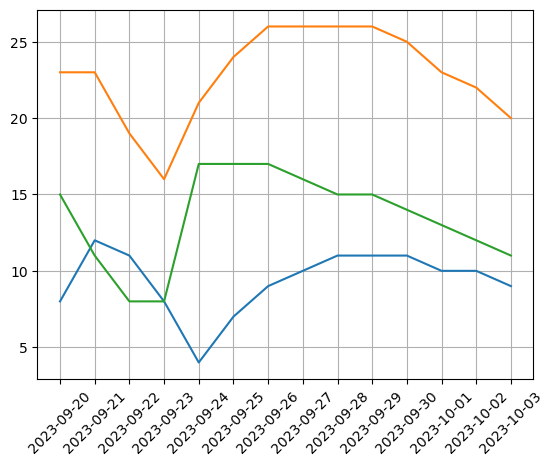

In [37]:
## Prépare Data
import urllib.request
import json
mint=[]
datt=[]
maxt=[]
#rawdata = urllib.request.urlopen('http://ws.meteofrance.com/ws/getLieux/bellegarde.json')
rawdata = urllib.request.urlopen('http://webservice.meteofrance.com/places?token=__Wj7dVSTjV9YGu1guveLyDq0g7S7TfTjaHBTPTpO0kj8__&lang=fr&q=bellegarde')
json_data=json.loads(rawdata.read())
print(json_data[0].keys())
print([(data["name"],data["postCode"]) for data in json_data])

rawdata = urllib.request.urlopen('http://webservice.meteofrance.com/places?token=__Wj7dVSTjV9YGu1guveLyDq0g7S7TfTjaHBTPTpO0kj8__&lang=fr&q=billiat')
json_data=json.loads(rawdata.read())
# dict_keys(['ville', 'resumes', 'previsions', 'previsions48h', 'predict'])

print(json_data[0].keys())
print(json_data)
from datetime import datetime
from pytz import utc
import matplotlib

#utc.localize(datetime.utcfromtimestamp(timestamp))

rawdata = urllib.request.urlopen(f'http://webservice.meteofrance.com/forecast?token=__Wj7dVSTjV9YGu1guveLyDq0g7S7TfTjaHBTPTpO0kj8__&lat={json_data[0]["lat"]}&lon={json_data[0]["lon"]}&lang=fr')
json_data=json.loads(rawdata.read())
print(json_data.keys())

for forcast in json_data["daily_forecast"]:
    date=utc.localize(datetime.utcfromtimestamp(forcast["dt"])).strftime("%Y-%m-%d")
    description=forcast["weather12H"]["desc"]
    # vent=forcast["wind"]["speed"]
    tempMin=forcast["T"]["min"]
    tempMax = forcast["T"]["max"]
    #uv=data["indiceUV"]
    #confiance=data["indiceConfiance"]
    mint.append(int(tempMin) if int(tempMin)<int(tempMax) else int(tempMax))
    maxt.append(int(tempMin) if int(tempMin)>int(tempMax) else int(tempMax))
    datt.append(date)

    print(f"{date} : {tempMin} - {tempMax} => {description}")

from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(datt, [int(m) for m in mint])
ax.plot(datt, [int(m) for m in maxt])
ax.plot(datt, [int(maxt[m])-int(mint[m]) for m in range(0,len(maxt))])
plt.xticks(rotation=45)
ax.grid(True)
plt.show()

2023-09-20 : 06:00 : 9 - 9 => Ensoleillé
2023-09-20 : 07:00 : 12.2 - 12.2 => Ensoleillé
2023-09-20 : 08:00 : 15.4 - 16.5 => Ensoleillé
2023-09-20 : 09:00 : 18.5 - 20.6 => Ensoleillé
2023-09-20 : 10:00 : 19.3 - 21.8 => Ensoleillé
2023-09-20 : 11:00 : 20.1 - 23.1 => Ensoleillé
2023-09-20 : 12:00 : 20.9 - 24.3 => Ensoleillé
2023-09-20 : 13:00 : 21.3 - 25 => Ciel voilé
2023-09-20 : 14:00 : 21.7 - 25.7 => Ciel voilé
2023-09-20 : 15:00 : 22.1 - 26.5 => Ciel voilé
2023-09-20 : 16:00 : 20.5 - 24.3 => Eclaircies
2023-09-20 : 17:00 : 18.8 - 22.2 => Eclaircies
2023-09-20 : 18:00 : 17.2 - 20.1 => Eclaircies
2023-09-20 : 19:00 : 16.5 - 19.7 => Rares averses
2023-09-20 : 20:00 : 15.8 - 19.2 => Rares averses
2023-09-20 : 21:00 : 15.2 - 18.8 => Rares averses
2023-09-20 : 22:00 : 15 - 18.6 => Eclaircies
2023-09-20 : 23:00 : 14.9 - 14.9 => Eclaircies
2023-09-21 : 00:00 : 14.8 - 14.8 => Eclaircies
2023-09-21 : 01:00 : 14.5 - 14.5 => Eclaircies
2023-09-21 : 02:00 : 14.2 - 14.2 => Eclaircies
2023-09-21 : 0

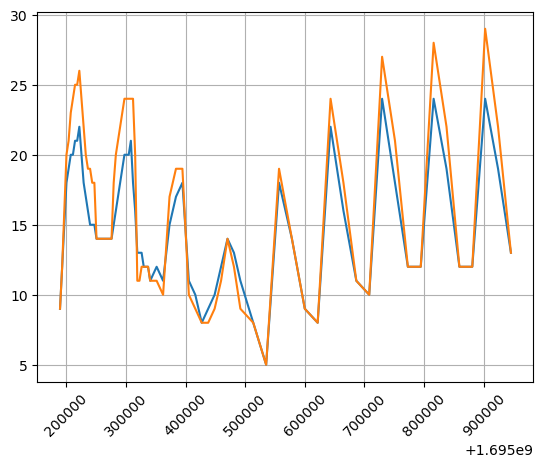

In [36]:
mint=[]
datt=[]
maxt=[]
for forcast in json_data["forecast"]:
    
    date=utc.localize(datetime.utcfromtimestamp(forcast["dt"])).strftime("%Y-%m-%d : %H:%M")
    description=forcast["weather"]["desc"]
    vent=forcast["wind"]["speed"]
    temp=forcast["T"]["value"]
    tempchill = forcast["T"]["windchill"]
    #uv=data["indiceUV"]
    #confiance=data["indiceConfiance"]
    mint.append(temp)
    maxt.append(tempchill)
    datt.append(forcast["dt"])
    print(f"{date} : {temp} - {tempchill} => {description}")

from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(datt, [int(m) for m in mint])
ax.plot(datt, [int(m) for m in maxt])
plt.xticks(rotation=45)
ax.grid(True)
plt.show()